## IPBMA_8: CT Slice Reconstruction
### Author: Liu Cong and Ulloa Ferrer,Leonardo

In [81]:
import numpy as np
import matplotlib.pyplot as pyplot

In [147]:
import sys, os
from auxFiles.auxFnc import *
from auxFiles.CTFnc import *

try:
    auxFnc = os.path.join(sys.path[0], 'auxFiles', 'auxFnc.py')
    CTFnc = os.path.join(sys.path[0], 'auxFiles', 'CTFnc.py')
    %run {auxFnc}
    %run {CTFnc}
except:
    auxFnc = os.path.join('.', 'auxFiles', 'auxFnc.py')
    CTFnc = os.path.join('.', 'auxFiles', 'CTFnc.py')
    %run {CTFnc}

# READING SINOGRAM

In [83]:
pSinograma= np.load('sinogram.npy')

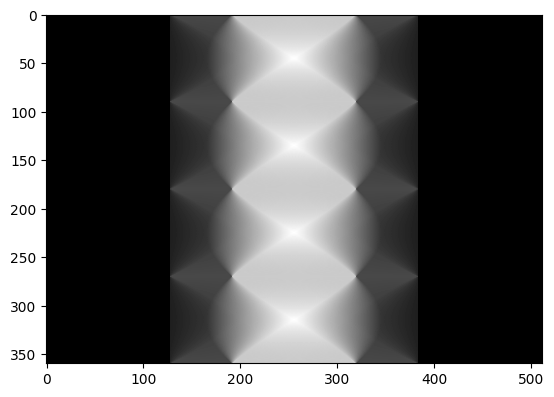

In [84]:
pyplot.imshow(pSinograma, cmap="gray")
pyplot.show()

In [85]:
# RECONSTRUCTOR
# 8 Projections, just to check
from PIL import Image

rImage= reconstructor(pSinograma, 8)

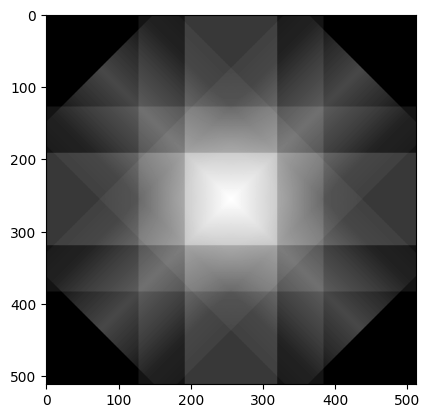

In [86]:
pyplot.imshow(rImage, cmap="gray")
pyplot.show()

In [87]:
# RECONSTRUCTOR

nProjections= 360
rImage= reconstructor(pSinograma, nProjections)

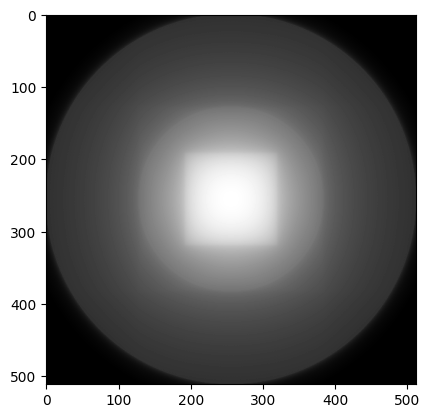

In [88]:
pyplot.imshow(rImage, cmap="gray")
pyplot.show()

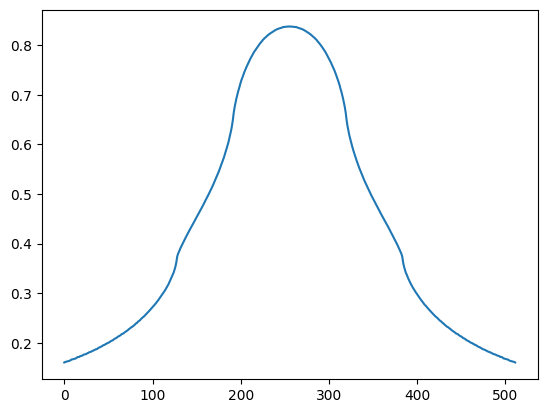

In [89]:
nLine= int(rImage.shape[0]/2)
line= getLine(rImage, nLine)

pyplot.plot(line)

In [90]:
# TRANSFORM TO HOUNSFIELD UNITS

eE= 40

hImage= setHounsfield(rImage, eE)

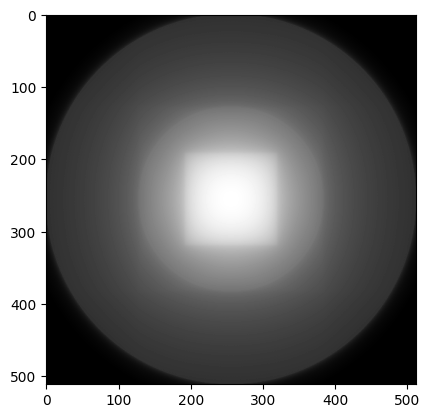

In [91]:
pyplot.imshow(hImage, cmap="gray")
pyplot.show()

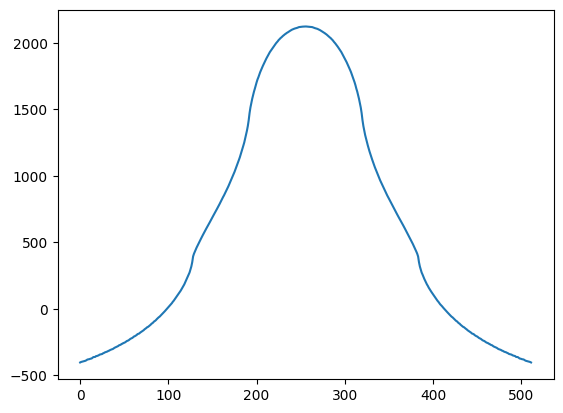

In [92]:
nLine= int(hImage.shape[0]/2)
line= getLine(hImage, nLine)

pyplot.plot(line)

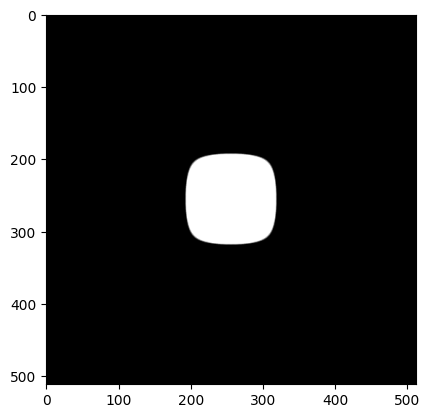

In [93]:
# W/L DISPLAY

vImage= displayWL(hImage, 50, 1500, 255)
pyplot.imshow(vImage, cmap="gray")
pyplot.show()

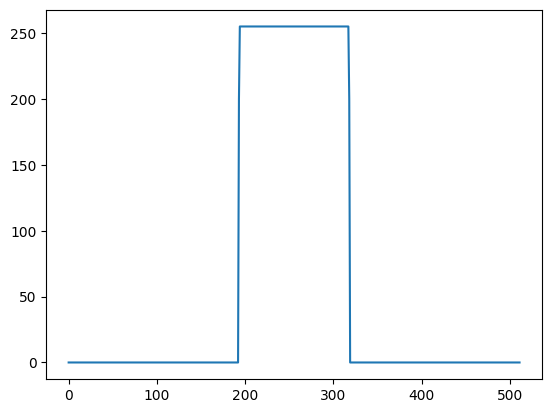

In [94]:
nLine= int(vImage.shape[0]/2)
line= getLine(vImage, nLine)

pyplot.plot(line)

EXPERIMENTS

In [95]:
W= 50
L= 1500
maxGL= 255

In [98]:
# X-RAY SOURCE

kVp= 100
I0= 75000  
N0, eE= source(kVp, I0)

print(N0, eE)

75000 40.0


EXPERIMENT 1

Cube Phantom

In [100]:
edge_size= 256
obj= cube_phantom_cc(edge_size, eE)

0.28 1.28


Experiment 1.1

In [101]:
# FEATURES

nProjections= 360
h= 128
nDetectors= 512

In [108]:
qSinograma= interactor_CT(N0, obj, h, nProjections)
dSinograma= detectSinogram(qSinograma, nProjections, nDetectors)
pSinograma= process_CT(dSinograma, N0)

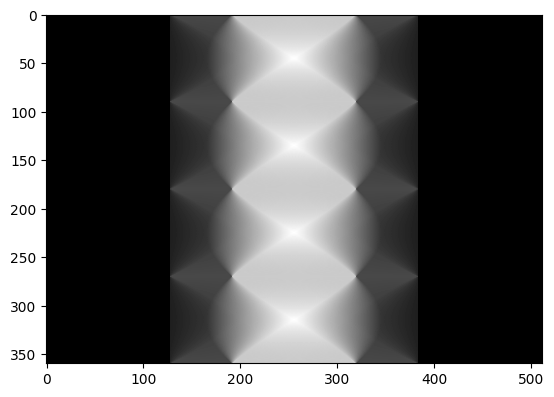

In [109]:
pyplot.imshow(pSinograma, cmap="gray")
pyplot.show()

In [110]:
rImage= reconstructor(pSinograma, nProjections)
hImage= setHounsfield(rImage, eE)
vImage= displayWL(hImage, W, L, maxGL)

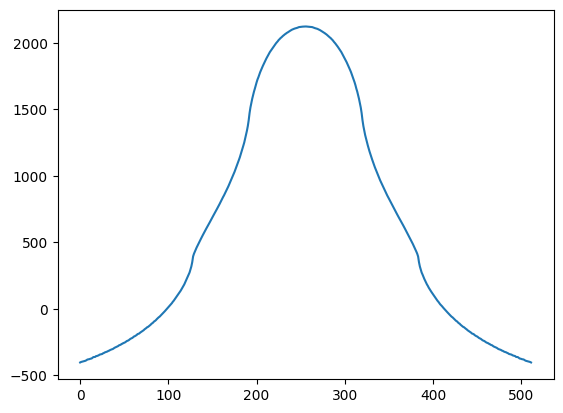

In [111]:
nLine= int(hImage.shape[0]/2)
line= getLine(hImage, nLine)

pyplot.plot(line)

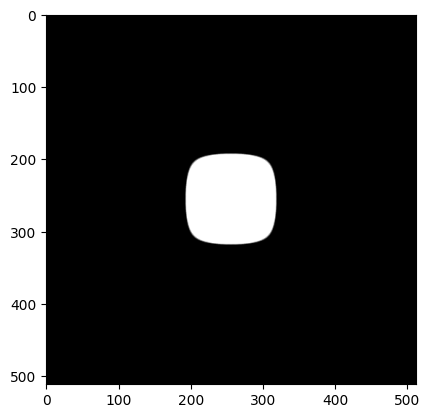

In [112]:
pyplot.imshow(vImage, cmap="gray")
pyplot.show()

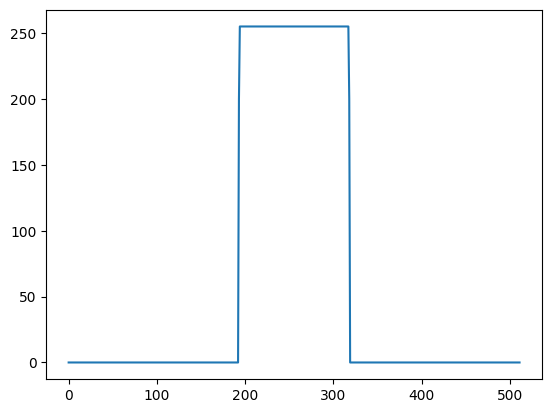

In [113]:
nLine= int(vImage.shape[0]/2)
line= getLine(vImage, nLine)

pyplot.plot(line)

Experiment 1.2

In [114]:
# FEATURES

nProjections= 360
h= 128
nDetectors= 1024

In [158]:
import sys, os
from auxFiles.auxFnc import *
from auxFiles.CTFnc import *

try:
    auxFnc = os.path.join(sys.path[0], 'auxFiles', 'auxFnc.py')
    CTFnc = os.path.join(sys.path[0], 'auxFiles', 'CTFnc.py')
    %run {auxFnc}
    %run {CTFnc}
except:
    auxFnc = os.path.join('.', 'auxFiles', 'auxFnc.py')
    CTFnc = os.path.join('.', 'auxFiles', 'CTFnc.py')
    %run {CTFnc}

qSinograma= interactor_CT(N0, obj, h, nProjections)
dSinograma= detectSinogram(qSinograma, nProjections, nDetectors)
pSinograma= process_CT(dSinograma, N0)

(0,)


ValueError: could not broadcast input array from shape (0,) into shape (1024,)

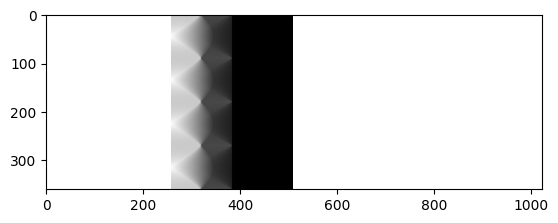

In [156]:
pyplot.imshow(pSinograma, cmap="gray")
pyplot.show()